\***\*============================GRAPH PREPROCESSING============================**


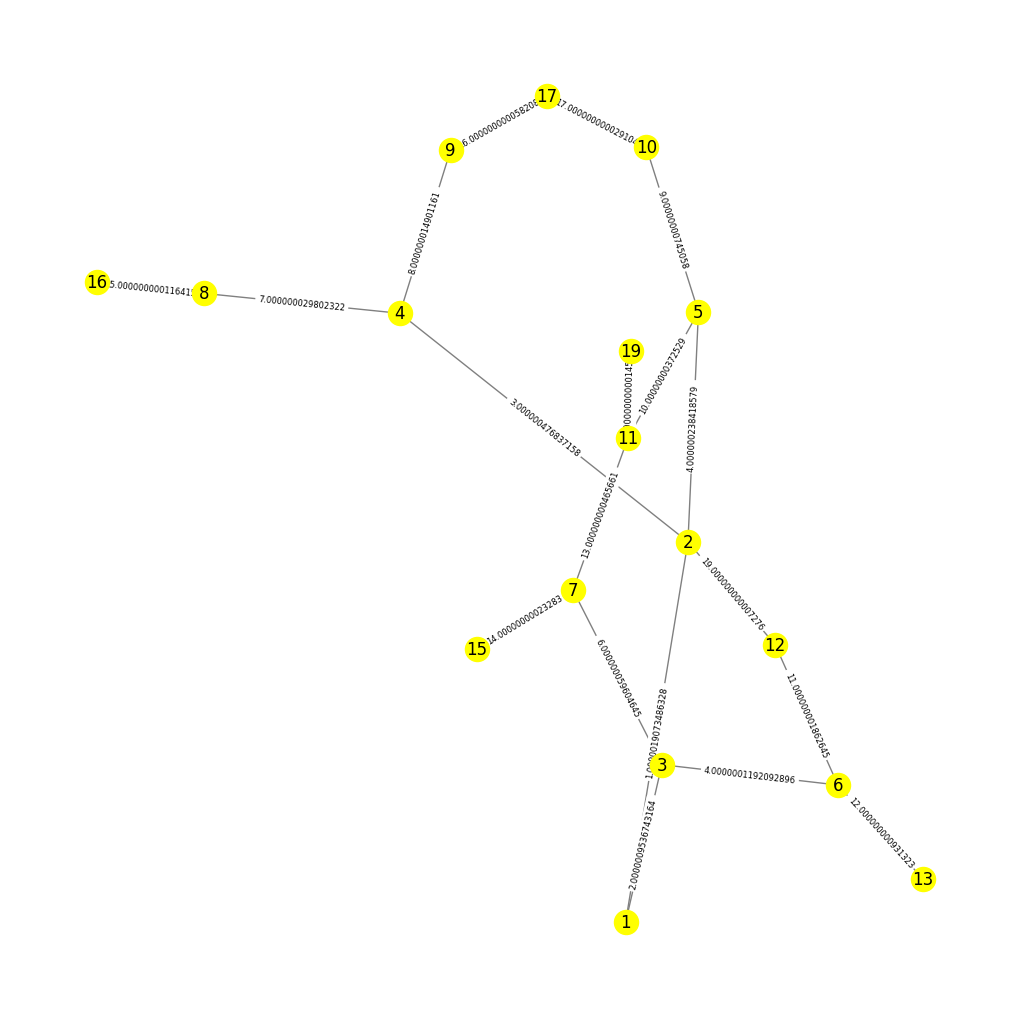

In [3]:
# Example usage
import networkx as nx
import matplotlib.pyplot as plt


# Define the Edge class
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight


def preprocess_graph(G):
    # assuming 'weight' is the name of the attribute for edge weights
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))


# num_nodes = 10

# Define a small fraction
fraction = []
for i in range(19):
    fraction.append(1/(2 ** (19+i)))

# Generate edges with unique weights
edges = [
    Edge(1, 2, 1 + fraction[0]),
    Edge(1, 3, 2 + fraction[1]),
    Edge(2, 4, 3 + fraction[2]),
    Edge(2, 5, 4 + fraction[3]),
    Edge(3, 6, 4 + fraction[4]),
    Edge(3, 7, 6 + fraction[5]),
    Edge(4, 8, 7 + fraction[6]),
    Edge(4, 9, 8 + fraction[7]),
    Edge(5, 10, 9 + fraction[8]),
    Edge(5, 11, 10 + fraction[9]),
    Edge(6, 12, 11 + fraction[10]),
    Edge(6, 13, 12 + fraction[11]),
    Edge(7, 11, 13 + fraction[12]),
    Edge(7, 15, 14 + fraction[13]),
    Edge(8, 16, 15 + fraction[14]),
    Edge(9, 17, 16 + fraction[15]),
    Edge(10, 17, 17 + fraction[16]),
    Edge(11, 19, 18 + fraction[17]),
    Edge(12, 2, 19 + fraction[18]),
]
G = nx.Graph()
# Add edges to the graph
for edge in edges:
    G.add_edge(edge.u, edge.v, weight=edge.weight)

# Preprocess the graph
D = preprocess_graph(G)

# Create a new figure with a larger size
plt.figure(figsize=(10, 10))

# Draw the graph using the spring_layout
pos = nx.spring_layout(G)
nx.draw(
    G, pos, with_labels=True, node_color="yellow", node_size=300, edge_color="gray"
)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels , font_size=6)

plt.show()
# print(D)


=================================== Distance Oracle =====================================


In [4]:
class DistanceOracle:
    def __init__(self, distances=None):
        if distances is None:
            self.data = {}
        else:
            self.data = distances

    def get_distance(self, u, v):
        return self.data.get(u, {}).get(v, float("inf"))

    def __getitem__(self, key):
        return self.data[key]

    def add_distance(self, u, v, distance):
        if u not in self.data:
            self.data[u] = {}
        self.data[u][v] = distance

    def add_edge(u, v, weight):
        G.add_edge(u, v, weight=weight)

    def get_edge_weight(G, u, v):
        if G.has_edge(u, v):
            return G[u][v]['weight']
        else:
            return None

In [5]:
# Create an instance of
distance_oracle = DistanceOracle(D)

\*\*---------------------------------SHORTEST PATH function and Store-------------------------------


In [6]:
import networkx as nx

def store_shortest_paths(G):
    shortest_paths = {}
    for u in G.nodes:
        for v in G.nodes:
            if u == v:
                shortest_paths[(u, v)] = [u]
            else:
                try:
                    path = nx.dijkstra_path(G, u, v, weight='weight')
                    shortest_paths[(u, v)] = path
                    shortest_paths[(v, u)] = path[::-1]  # reverse path for (v, u)
                except nx.NetworkXNoPath:
                    shortest_paths[(u, v)] = None
                    shortest_paths[(v, u)] = None
    return shortest_paths

shortest_paths = store_shortest_paths(G)

# Now you can access the shortest path between any pair of nodes like this:
print(shortest_paths[(13, 19)])
print(shortest_paths[(19, 13)])  # this will give the reverse of the path from 13 to 19

[13, 6, 3, 1, 2, 5, 11, 19]
[19, 11, 5, 2, 1, 3, 6, 13]


---------------------------------POWER_OF_2 FUNCTION--------------------------------


In [7]:
import math


def nearest_power_of_2(x):
    if x <= 0:
        return 1  # Return 1 for non-positive input
    elif math.isinf(x):
        return float('inf')  # Return infinity for infinite input
    else:
        return 2 ** math.floor(math.log2(x))

--------------------------------FIND_JUMP FUNCTION--------------------------------


In [8]:
def FINDJUMP(P, F):
    X = []  # Initialize X with s
    x = P[0]

    X.append(x)
    # F = list(F)

    u = min(F, key=lambda v: nearest_power_of_2(
        distance_oracle.get_distance(x, v)))

    # print(u)

    while True:

        # Find y, the first vertex on P[x, t] at distance >= max{1, (xu)^2} from x
        distance = max(1, nearest_power_of_2(
            distance_oracle.get_distance(x, u)))
        # print(distance)
        y = None
        for vertex in P[P.index(x)+1:]:
            if distance_oracle.get_distance(x, vertex) >= distance:
                y = vertex
                break

        if y is not None:
            X.append(y)
            x = y
        else:
            break

    return X

In [9]:
m = FINDJUMP([13, 6, 3, 7, 11, 19], {1, 3})
print(m)
# print(nearest_power_of_2(37)), {1, 3})
print(m)
# print(nearest_power_of_2(37))

[13, 3, 7, 11, 19]
[13, 3, 7, 11, 19]


**------------------------------MAXIMIZER FUNCTION--------------------------------
**


In [10]:
def get_edge_weight(G, u, v):
    if G.has_edge(u, v):
        return G[u][v]['weight']
    else:
        return None

In [11]:
len(G.edges())


19

In [12]:
import networkx as nx


def maximizer(x, y, d1, d2):

    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_path_new = None
    # xy_distance = distance_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and its length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges in edge list
    for u, v in edges_set:

        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            nx.has_path(G, x, u)
            and nx.has_path(G, y, v)
            and (distance_oracle.get_distance(x, u) >= d1
                 and distance_oracle.get_distance(y, v) >= d2)
            # or (distance_oracle.get_distance(x, u) >= d2
            #     and distance_oracle.get_distance(y, v) >= d1)
        ):

            max_edge1 = (u, v)
            max_edges.add(max_edge1)

    # print(max_edges)

    for u, v in max_edges:

        max_xy_distance = float('-inf')
        # Remove the (u, v) edge
        original_weight = get_edge_weight(G, u, v)
        # print(original_weight)

        if G.has_edge(u, v):
            G.remove_edge(u, v)

        
        # Calculate the xy path distance
        D = preprocess_graph(G)
        distance_oracle_new = DistanceOracle(D)

        if nx.has_path(G, x, y):
            xy_path = nx.shortest_path(G, x, y)
            max_uv_distance = distance_oracle_new.get_distance(x, y)
            if (max_uv_distance >= max_xy_distance):
                max_xy_edge = (u, v)
                max_xy_path = xy_path
        # Add the (u, v) edge back to the graph
        G.add_edge(u, v, weight=original_weight)
        D = preprocess_graph(G)
    # distance_oracle=DistanceOracle(D)
    
    # chandge max_xy_path to 2D-composable form
    # if max_xy_path is not None:
    #     for i in range(len(max_xy_path)-1):
    #         # max_xy_path_new =[]
    #         u = max_xy_path[0]
    #         v = max_xy_path[i+1]
    #         if all(node in max_xy_path for node in shortest_paths[(u, v)]):
    #             continue
    #         else:
    #             intermediate_edge = (max_xy_path[i], v)
    #             # print(intermediate_edge)
    #             s_to_a_path = shortest_paths[(u, max_xy_path[i])]
    #             # print(s_to_a_path)
    #             b_to_t_path = shortest_paths[(v, max_xy_path[len(max_xy_path)-1])]
    #             # print(b_to_t_path)
    #             max_xy_path_new = s_to_a_path, intermediate_edge, b_to_t_path
                
    # return max_xy_edge, max_xy_path_new
    return max_xy_edge, max_xy_path
    

In [13]:
maximizer(13, 19, 4, 4)

((2, 5), [13, 6, 3, 7, 11, 19])

==============================MAXIMIZER Storage=========================================


In [14]:
def find_max_distance(G, distance_oracle):
    max_distance = float("-inf")
    for key1, value1 in distance_oracle.items():
        for key2, value2 in value1.items():
            if value2 > max_distance:
                max_distance = value2
    return max_distance

In [15]:
max_d_value = int(find_max_distance(G, D))
d1_d2_list = []
i = nearest_power_of_2((max_d_value))

while i >= 1:
    d1_d2_list.append(i)
    i //= 2

In [16]:


# Initialize a dictionary to store the maximizer output
function_dict = {
    'maximizer': maximizer  # Replace 'maximizer' with the actual function name
}
maximizer_dict = {}

# Iterate over all pairs of nodes in the graph
for x in G.nodes:
    for y in G.nodes:
        # if x != y:  # we don't want pairs of the same node
        # Iterate over all possible d1 and d2 values
        for d1 in d1_d2_list:
            for d2 in d1_d2_list:
                try:
                    # Call the maximizer function and store the result
                    result = function_dict['maximizer'](x, y, d1, d2)
                    if result is not None:
                        max_edge, max_path = result
                        # Store the result in the results dictionary
                        maximizer_dict[(x, y, d1, d2)] = (max_edge, max_path)
                except nx.NetworkXNoPath:
                    print(f"No path between {x} and {y}.")
print(maximizer_dict)

{(1, 1, 32, 32): (None, None), (1, 1, 32, 16): (None, None), (1, 1, 32, 8): (None, None), (1, 1, 32, 4): (None, None), (1, 1, 32, 2): (None, None), (1, 1, 32, 1): (None, None), (1, 1, 16, 32): (None, None), (1, 1, 16, 16): (None, None), (1, 1, 16, 8): (None, None), (1, 1, 16, 4): (None, None), (1, 1, 16, 2): (None, None), (1, 1, 16, 1): (None, None), (1, 1, 8, 32): (None, None), (1, 1, 8, 16): (None, None), (1, 1, 8, 8): (None, None), (1, 1, 8, 4): (None, None), (1, 1, 8, 2): (None, None), (1, 1, 8, 1): (None, None), (1, 1, 4, 32): (None, None), (1, 1, 4, 16): (None, None), (1, 1, 4, 8): (None, None), (1, 1, 4, 4): (None, None), (1, 1, 4, 2): (None, None), (1, 1, 4, 1): (None, None), (1, 1, 2, 32): (None, None), (1, 1, 2, 16): (None, None), (1, 1, 2, 8): (None, None), (1, 1, 2, 4): (None, None), (1, 1, 2, 2): (None, None), (1, 1, 2, 1): (None, None), (1, 1, 1, 32): (None, None), (1, 1, 1, 16): (None, None), (1, 1, 1, 8): (None, None), (1, 1, 1, 4): (None, None), (1, 1, 1, 2): (None, No

In [17]:
shortest_paths[(1, 16)]

[1, 2, 4, 8, 16]

In [18]:
maximizer_dict[(13, 19, 16, 16)]

((5, 11), [13, 6, 3, 7, 11, 19])

===============================MAIN: QUERY FUNCTION====================================


In [39]:
def is_valid_path(G, path):
    return all(G.has_edge(path[i], path[i+1]) for i in range(len(path) - 1)) and (len(path) < 2 or G.has_edge(path[-2], path[-1]))

def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result

def QUERY(s, t, e):
    # Check if the edge e is in the graph
    if not (G.has_edge(e.u, e.v) or G.has_edge(e.v, e.u)):
        print("The edge to avoid is not in the graph.")
        return [], float('inf')

    # Check if there is a valid path between s and t
    if shortest_paths[(s, t)] is None and shortest_paths[(t, s)] is None:
        print("There is no valid path between the source and destination vertices.")
        return [], float('inf')

    JUMP_st = FINDJUMP(shortest_paths[(s, t)], {e.u, e.v})
    JUMP_ts = FINDJUMP(shortest_paths[(t, s)], {e.u, e.v})
    # print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")

    final_shortest_path = []
    shortest_path_distance = float("inf")

    for x in JUMP_st:
        for y in JUMP_ts:
            if distance_oracle.get_distance(s, e.u) > distance_oracle.get_distance(s, e.v):
                e.u, e.v = e.v, e.u
            d1 = nearest_power_of_2(distance_oracle.get_distance(x, e.u))
            d2 = nearest_power_of_2(distance_oracle.get_distance(y, e.v))
            # print(f"d1={d1}, d2={d2}")
            e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
            # print(f"e_star={e_star}, xy_e_star={xy_e_star}")

            if xy_e_star is None:
                xy_e_star = []
            # else:
            #     xy_e_star = [item for sublist in xy_e_star for item in sublist]  # Flatten the list of lists

            sx_path = shortest_paths[(s, x)]
            yt_path = shortest_paths[(y, t)]

            if sx_path is None or yt_path is None:
                continue  # Skip if there is no valid path from s to x or y to t

            P = remove_duplicates(sx_path + xy_e_star + yt_path)
            # print(f"P={P}")

            if is_valid_path(G, P):
                p_distance = sum(get_edge_weight(G, P[i], P[i+1]) for i in range(len(P) - 1))  
                # print(f"p_distance={p_distance}")
            else:
                p_distance = float('inf')

            # Check if e is not in P and the distance of P is shorter than the current shortest path
            if (e.u, e.v) not in zip(P, P[1:]) and (e.v, e.u) not in zip(P, P[1:]) and p_distance < shortest_path_distance:
                final_shortest_path = P
                shortest_path_distance = p_distance

    return final_shortest_path, shortest_path_distance

==================================== USer Input & FINAL OUTPUT =================================


In [41]:
# Get user input for source and destination vertices
try:
    s, t = map(int, input("Enter source and destination vertices (s t): ").split())
except ValueError:
    print("Invalid input. Please enter two integers separated by a space.")
    exit()

# Get user input for the edge to avoid and its weight
try:
    e_u, e_v = map(int, input("Enter the edge to avoid and its weight (u v): ").split())
except ValueError:
    print("Invalid input. Please enter two integers separated by a space.")
    exit()

# Check if the vertices and the edge exist in the graph
if not (G.has_node(s) and G.has_node(t) and G.has_edge(e_u, e_v) or G.has_edge(e_v, e_u)):
    print("Invalid input. The vertices or the edge do not exist in the graph.")
    exit()

# Create an Edge object for the edge to avoid
e = Edge(e_u, e_v, distance_oracle.get_distance(e_u, e_v))

# Call the QUERY function with the instance of DistanceOracle
path = QUERY(s, t, e)

# Print the path
if path is None:
    print("No path found.")
else:
    print("Path:", path)

Path: ([13, 6, 3, 1, 2, 5, 11, 19], 51.00000322332198)


**Check Corretness of path between s to t after avoiding edg**


In [ ]:
try:
    if G.has_edge(e_u, e_v):
        G.remove_edge(e_u, e_v)

    st_path = nx.dijkstra_path(G, s, t, weight='weight')
except nx.NetworkXNoPath:
    st_path = []

print(st_path)

[13, 6, 3, 7, 11, 19]
